# Predição das vendas de um jogo usando Regressão Linear


## O trabalho terá duas abordagens diferentes para comparações no futuro
> 1) A primeira será preencher os dados faltantes com a média: Critic_Score, ESRB_Rating <br> <br>
> 2) A segunda será remover todas as linhas que não possuem dados sobre a Critic_Score
Ao final os dois resultados serão comparados

## Segunda abordagem (Excluir linhas com dados faltantes de Critic_Score)

## Obtendo e visualizando os dados

### Importando o arquivo da base de dados

In [1]:
import pandas as pd
df = pd.read_csv('vgsales-12-4-2019.csv')

### Dados sobre o atributo objetivo

In [2]:
print('Média de vendas: ', df['Global_Sales'].mean())
print('Desvio padrão das vendas: ', df['Global_Sales'].std())
print('Número de jogos: ',len(df))
print('Número de jogos com dados sobre vendas: ', len(df) - len(df[df['Global_Sales'].isnull()]))

Média de vendas:  0.3655029616276075
Desvio padrão das vendas:  0.8330216180581668
Número de jogos:  55792
Número de jogos com dados sobre vendas:  19415


### Visualizando a estrutura da base de dados

#### Colunas presentes na base de dados

In [3]:
print(df.columns.values)

['Rank' 'Name' 'basename' 'Genre' 'ESRB_Rating' 'Platform' 'Publisher'
 'Developer' 'VGChartz_Score' 'Critic_Score' 'User_Score' 'Total_Shipped'
 'Global_Sales' 'NA_Sales' 'PAL_Sales' 'JP_Sales' 'Other_Sales' 'Year'
 'Last_Update' 'url' 'status' 'Vgchartzscore' 'img_url']


#### Verificando a presença dos valores dos atributos

In [4]:
print('Tamanho do df: ', len(df))
df.count()

Tamanho do df:  55792


Rank              55792
Name              55792
basename          55792
Genre             55792
ESRB_Rating       23623
Platform          55792
Publisher         55792
Developer         55775
VGChartz_Score        0
Critic_Score       6536
User_Score          335
Total_Shipped      1827
Global_Sales      19415
NA_Sales          12964
PAL_Sales         13189
JP_Sales           7043
Other_Sales       15522
Year              54813
Last_Update        9186
url               55792
status            55792
Vgchartzscore       799
img_url           55792
dtype: int64

## Limpeza e pré-processamento dos dados

### Tirando colunas que estão vazias, com dados não necessários e com muitos dados faltantes

In [5]:
df = df.drop(["VGChartz_Score", "img_url", "url", "status", "Last_Update", "User_Score", 'Total_Shipped', 'Vgchartzscore', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Rank', 'basename', 'Name'], axis=1)

In [6]:
df.dropna(axis=0, subset=['Global_Sales', 'Developer', 'Year'], inplace=True)

In [7]:
print('Tamanho do df: ', len(df))
df.count()

Tamanho do df:  19374


Genre           19374
ESRB_Rating     13790
Platform        19374
Publisher       19374
Developer       19374
Critic_Score     4273
Global_Sales    19374
Year            19374
dtype: int64

### Excluir linhas que não possuem dados sobre crítica e ESRB_Rating

In [8]:
df.dropna(axis=0, subset=['Critic_Score', 'ESRB_Rating'], inplace=True)

print('Tamanho do df: ', len(df))
df.count()

Tamanho do df:  4170


Genre           4170
ESRB_Rating     4170
Platform        4170
Publisher       4170
Developer       4170
Critic_Score    4170
Global_Sales    4170
Year            4170
dtype: int64

### Transformando valores descritivos (categóricos) em numéricos
#### (Genre, ESRB_Rating, Platform, Publisher, Developer)

In [9]:
df['Genre'] = pd.Categorical(df['Genre'])
df['ESRB_Rating'] = pd.Categorical(df['ESRB_Rating'])
df['Platform'] = pd.Categorical(df['Platform'])
df['Publisher'] = pd.Categorical(df['Publisher'])
df['Developer'] = pd.Categorical(df['Developer'])

df_Genre_Dummies = pd.get_dummies(df['Genre'], prefix = 'Genre')
df_ESBR_Dummies = pd.get_dummies(df['ESRB_Rating'], prefix = 'ESRB_Rating')
df_Platform_Dummies = pd.get_dummies(df['Platform'], prefix = 'Platform')
df_Publisher_Dummies = pd.get_dummies(df['Publisher'], prefix = 'Publisher')
df_Developer_Dummies = pd.get_dummies(df['Developer'], prefix = 'Developer')

df = pd.concat([df, df_Genre_Dummies], axis=1)
df = pd.concat([df, df_ESBR_Dummies], axis=1)
df = pd.concat([df, df_Platform_Dummies], axis=1)
df = pd.concat([df, df_Publisher_Dummies], axis=1)
df = pd.concat([df, df_Developer_Dummies], axis=1)

df = df.drop(['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer'], axis=1)

df.shape

(4170, 1303)

### Transformando Global_Sales em Sales_Year

In [10]:
Sales_Year = []
for i in range(len(df)):
    newValue = df.iloc[i]['Global_Sales'] / (2021 - df.iloc[i]['Year']) 
    Sales_Year.append(newValue)
df['Sales_Year'] = Sales_Year
df = df.drop(['Year', 'Global_Sales'], axis=1)

### Removendo Outliers

In [11]:
df = df[df['Sales_Year'] < 0.5]
print(max(df['Sales_Year']))

0.4925


### Separando os dados em teste e treino

In [12]:
from sklearn.model_selection import train_test_split
df_Y = df['Sales_Year']
df_X = df.drop('Sales_Year', axis=1)
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y)

### Escalando os atributos

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df_X_train_scaled = scaler.fit_transform(df_X_train)
df_X_train = pd.DataFrame(df_X_train_scaled)

df_X_test_scaled = scaler.fit_transform(df_X_test)
df_X_test = pd.DataFrame(df_X_test_scaled)

### Executando algoritmo (ainda a trabalhar)

In [14]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [15]:
rmse_val = [] #to store rmse values for different k
for K in range(3,14,3):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(df_X_train, df_Y_train)  #fit the model
    pred=model.predict(df_X_test) #make prediction on test set
    error = sqrt(mean_squared_error(df_Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, 'r2:', r2_score(df_Y_test, pred))

RMSE value for k=  3 is: 0.06539590669875461 r2: 0.2632939471113602
RMSE value for k=  6 is: 0.06450390515584918 r2: 0.28325425493665846
RMSE value for k=  9 is: 0.06565270435727578 r2: 0.2574967697324314
RMSE value for k=  12 is: 0.06508464994868439 r2: 0.2702900741396299


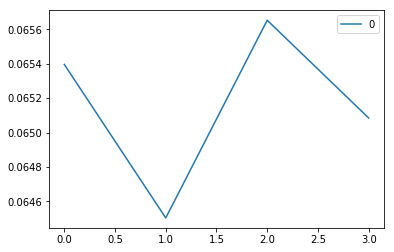

In [16]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [19]:
from sklearn.metrics import r2_score
print('r2:', r2_score(df_Y_test, pre_error(df_Y_test,pred))) #calculate rmse
print('rmse:', sqrt(mean_squared_error(df_Y_test,pred))) #calculate rmse

NameError: name 'pre_error' is not defined